# Introdução ao Pandas

Pandas é uma biblioteca de código aberto para manipulação e análise de dados em Python.

Desenvolvido sobre o NumPy, fornece estruturas de dados de alto desempenho e fáceis de usar.

- Por que usar o Pandas para análise de dados?

Facilita a manipulação e análise eficiente de dados.

Oferece estruturas como Séries e DataFrames para lidar com dados tabulares.

Integrado com outras bibliotecas populares como Matplotlib e Seaborn para visualização.

Utilize o comando ```pip install pandas``` para instalar a biblioteca.

In [5]:
%pip install pandas


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importe a biblioteca `pandas as pd`

In [6]:
import pandas as pd

Usaremos além do pandas, o `numpy`, biblioteca para computação científica e o `matplotlib`, biblioteca principal para visualização de dados, entretanto, como veremos mais adiante, o próprio pandas nos fornece facilidades em relação à visualização de dados, com métodos construídos com base no matplotlib

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Estruturas de Dados em Pandas:

### `Séries`:

Uma dimensão de dados semelhante a um array ou lista.

#### Criando Séries:

In [8]:
# Criando uma série a partir de uma lista
serie_exemplo = pd.Series([10, 20, 30, 40])
print(serie_exemplo)


0    10
1    20
2    30
3    40
dtype: int64


Cada elemento na série possui um índice associado automaticamente.

Pode ser conveniente atribuirmos um índice diferente do padrão, supondo que essas sejam notas de uma turma, poderíamos atribuir nomes ao index:

In [9]:
notas = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])
print(notas)

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      6
dtype: int64


#### Acessando elementos:

In [10]:
# Acessando um elemento pelo índice
print(serie_exemplo[2])  # Saída: 30

30


In [11]:
print(notas['Julia']) # Nota da Julia

10


In [12]:
# Slicing na série
print(serie_exemplo[1:3]) # Saída: Valores nas posições 1 e 2

1    20
2    30
dtype: int64


In [13]:
print(notas[1:3]) # Saída: Valores nas posições 1 e 2

Abbie    7
Harry    5
dtype: int64


In [14]:
print(notas['Abbie':'Julia']) # Saída: Valores entre as posições, inclusive 'Abbie' e 'Julia'.

Abbie     7
Harry     5
Julia    10
dtype: int64


Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas sobre os valores, 

como média .mean() e desvio padrão .std()

In [15]:
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())

Média: 6.0
Desvio padrão: 2.9154759474226504


Geralmente para resumir brevemente as estatísticas dos dados se usa o .describe()

In [16]:
notas.describe()

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

A estrutura é flexível o suficiente pra aplicarmos algumas expressões matemáticas e funções matemáticas do numpy diretamente:

In [17]:
notas**2

Wilfred      4
Abbie       49
Harry       25
Julia      100
Carrie      36
dtype: int64

In [18]:
np.log(notas)

Wilfred    0.693147
Abbie      1.945910
Harry      1.609438
Julia      2.302585
Carrie     1.791759
dtype: float64

### `DataFrames`:
Estrutura bidimensional tabular. Como uma planilha

#### Criando DataFrames:

Usando um dicionário como entrada dos dados

In [19]:
# Criando um DataFrame a partir de um dicionário
data = {'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]}

df = pd.DataFrame(data)
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Os tipos de dados que compõe as colunas podem ser verificados por um método próprio:

In [20]:
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object

Cada coluna no DataFrame é uma série.

#### Acessando dados:

É possível acessar a lista de colunas de forma bem intuitiva:

In [21]:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')

In [22]:
# Acessando uma coluna pelo nome
df["Seminário"]

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
Name: Seminário, dtype: float64

In [23]:
# Acessando uma linha pelo índice
print(df.loc[1])

Aluno        Abbie
Faltas           4
Prova            7
Seminário      7.5
Name: 1, dtype: object


O método loc é usado para acessar linhas pelo rótulo do índice.

Para DataFrames, .describe() também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:


In [24]:
df.describe()

,Faltas,Prova,Seminário
count,5.00000,5.000000,5.00000
mean,2.80000,6.000000,8.10000
std,1.30384,2.915476,0.65192
min,1.00000,2.000000,7.50000
25%,2.00000,5.000000,7.50000
50%,3.00000,6.000000,8.00000
75%,4.00000,7.000000,8.50000
max,4.00000,10.000000,9.00000


Outra tarefa comum aplicada em DataFrames é ordená-los por determinada coluna:

In [25]:
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Note que simplesmente usar o método sort_values não modifica o nosso DataFrame original:

In [26]:
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Para selecionar de acordo com critérios condicionais, se usa o que se chama de `Boolean Indexing`.

Suponha que queiramos selecionar apenas as linhas em que o valor da coluna `Seminário seja acima de 8.0`, podemos realizar esta tarefa passando a condição diretamente como índice:

In [27]:
df[df["Seminário"] > 8.0]

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


In [28]:

df["Seminário"] > 8.0

0     True
1    False
2     True
3    False
4    False
Name: Seminário, dtype: bool

Este tipo de indexação também possibilita checar condições de múltiplas colunas. 

Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, &, |, ~ ao invés de and, or, not, respectivamente. 

Suponha que além de `df["Seminário"] > 8.0` queiramos que o valor da coluna `Prova não seja menor que 3`:

In [29]:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0


## Leitura de Dados

O pandas nos fornece uma série de funcionalidades de leitura de dados, pros mais diversos formatos estruturais de dados, entre eles estão:

- pd.read_csv, para ler arquivos .csv, formato comum de armazenar dados de tabelas

- pd.read_xlsx, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.

- pd.read_html, para ler tabelas diretamente de um website

In [30]:
df = pd.read_csv(f"data/dados.csv")
df

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55


Como esperado, o DataFrame tem muitas linhas de dados, pra visualizar sucintamente as primeiras linhas de um DataFrame existe o 

método .head()

In [31]:
df.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [32]:
df.head(n=10)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


Similarmente existe o .tail(), que exibe por padrão as últimas 5 linhas do DataFrame:

In [33]:
df.tail()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


## Manipulação de Dados

Segue link do conteúdo completo https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1

## Visualização de Dados

Comecemos verificando que tanto Series como DataFrame possuem um método .plot() que também é um atributo e 

pode ser encadeado para gerar visualização de diversos tipos, 

como histograma, área, pizza e dispersão, com respectivamente .hist(), .area(), .pie() e .scatter(), além de vários outros.

<Axes: ylabel='Frequency'>

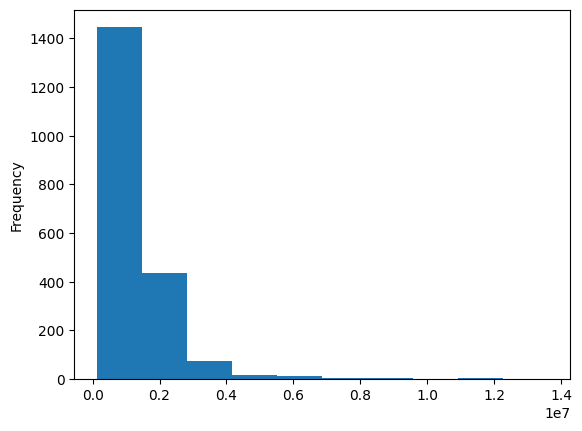

In [34]:
df["preco"].plot.hist()

<Axes: ylabel='Frequency'>

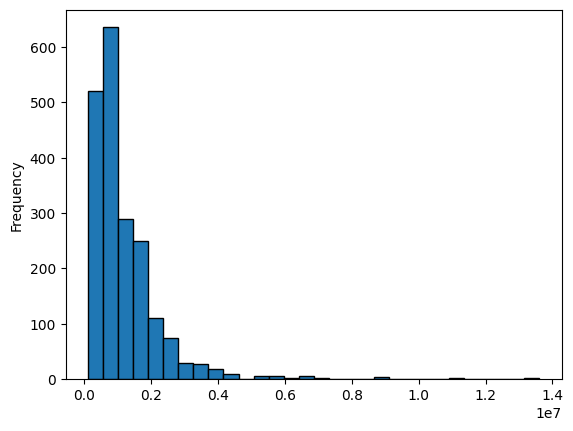

In [35]:
df["preco"].plot.hist(bins=30, edgecolor='black')

Podemos usar os valores de contagem de cada bairro como exemplo de dado para um plot tanto de barras verticais quando de barras horizontais, para verificar visualmente esses dados:

In [36]:
df["bairro"].value_counts()

bairro
Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: count, dtype: int64

<Axes: title={'center': 'Número de apartamentos'}, xlabel='bairro'>

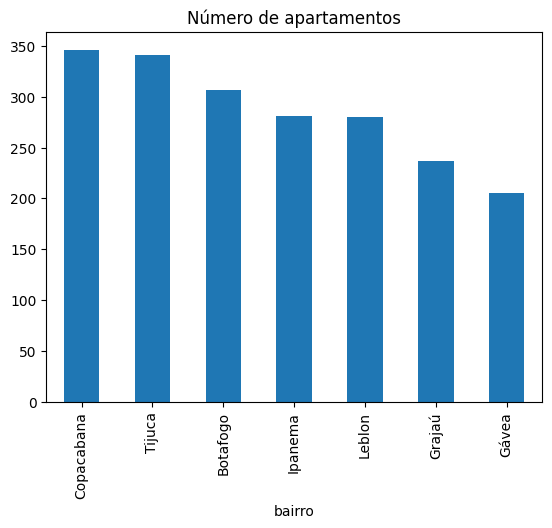

In [37]:
df["bairro"].value_counts().plot.bar(title="Número de apartamentos")

<Axes: title={'center': 'Número de apartamentos'}, ylabel='bairro'>

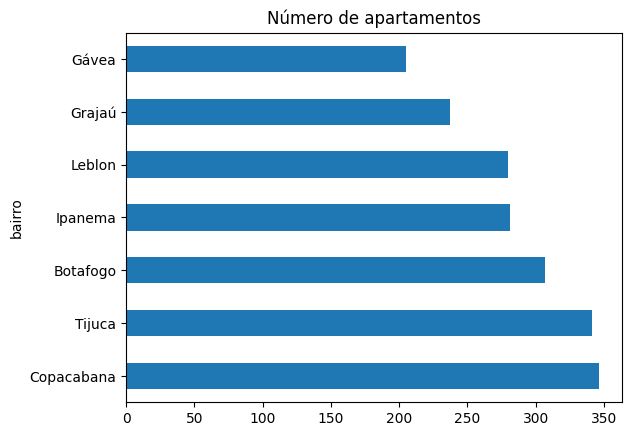

In [38]:
df["bairro"].value_counts().plot.barh(title="Número de apartamentos")

Um gráfico de dispersão usando um DataFrame pode ser usado especificando-se quais colunas usar como dados no eixo x e y:

Para fins estéticos, o matplotlib fornece uma série de styles diferentes que podem ser usados, um deles é o ggplot

<Axes: xlabel='preco', ylabel='area'>

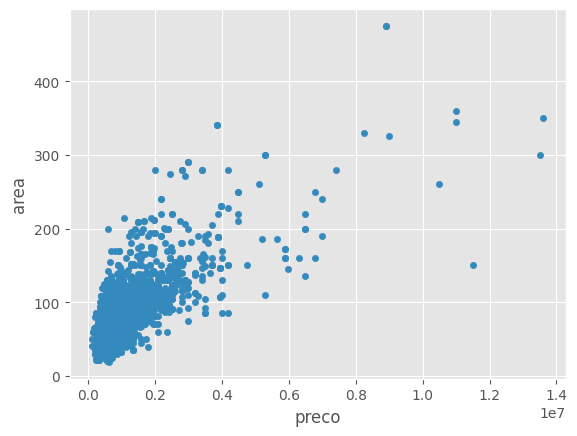

In [39]:
plt.style.use('ggplot')
df.plot.scatter(x='preco', y='area')

A lista de estilos disponíveis pode ser vista através de um método próprio

In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Uma coisa a se notar do gráfico de scatter é a `poluição` causada pela enorme quantidade de dados agrupadas num dos cantos do gráfico, além de podermos diminuir o tamanho dos pontos passando o argumento `s` ao método .scatter 

podemos também usar um método do pandas que cria uma amostragem aleatória dos dados.

O `.sample` pode receber tanto um argumento `frac`, que determina uma fração dos itens que o método retornará (no caso abaixo, 10%), ou `n`, que determina um valor absoluto de itens.

<Axes: xlabel='preco', ylabel='area'>

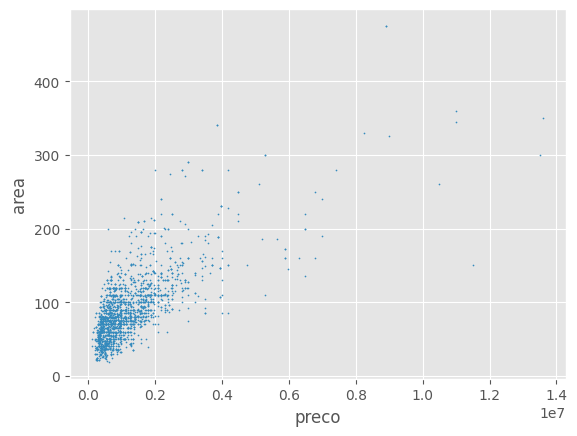

In [41]:
df.plot.scatter(x='preco', y='area', s=.5)

<Axes: xlabel='preco', ylabel='area'>

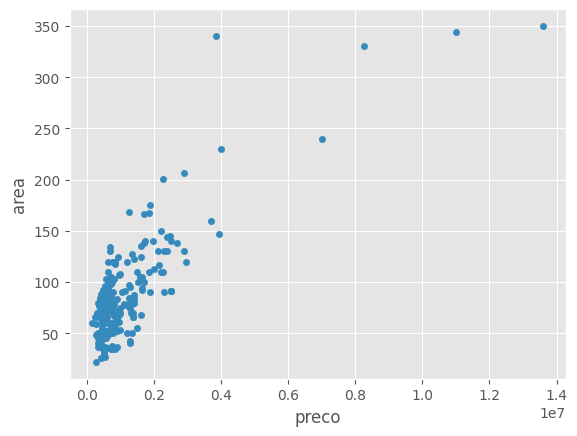

In [42]:
df.sample(frac=.1).plot.scatter(x='preco', y='area')

## Salvando um dataframe

Finalmente, a tarefa de salvar seu DataFrame externamente para um formato específico é feita com a mesma simplicidade que a leitura de dados é feita no pandas, pode-se usar, por exemplo, o método to_csv, e o arquivo será criado com os dados do DataFrame:

In [43]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})

df.to_csv(f"data/aulas.csv", index=False)

pd.read_csv(f"data/aulas.csv")

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
